<a href="https://colab.research.google.com/github/Ashok401/AIML_BootCamp/blob/main/Capstone_iPhone_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/iphone.csv')

In [20]:
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [21]:
df.shape

(3062, 11)

In [22]:
df.dropna(axis=0, inplace=True)

In [23]:
df.shape

(2960, 11)

In [24]:
df[df['ratingScore'] == 5].value_counts().sum()

np.int64(1539)

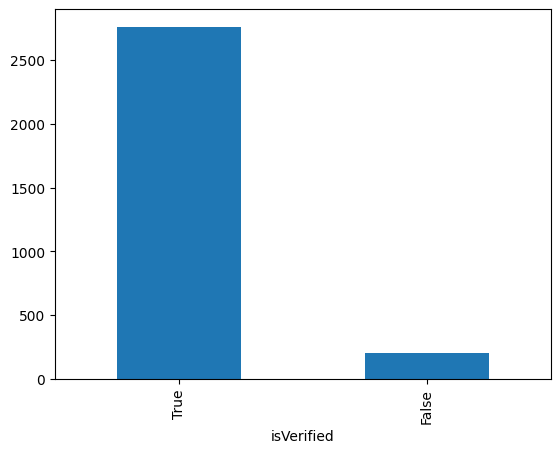

In [25]:
value_counts = df['isVerified'].value_counts()
value_counts.plot(kind='bar')
plt.show()


In [26]:
df['variant'].describe()
#Most popular model from the set: Colour: BlueSize: 128 GB

,variant
count,2960
unique,86
top,Colour: BlueSize: 128 GB
freq,292


In [27]:
df['reviewDescription'].describe()

,reviewDescription
count,2960
unique,2281
top,Good
freq,32


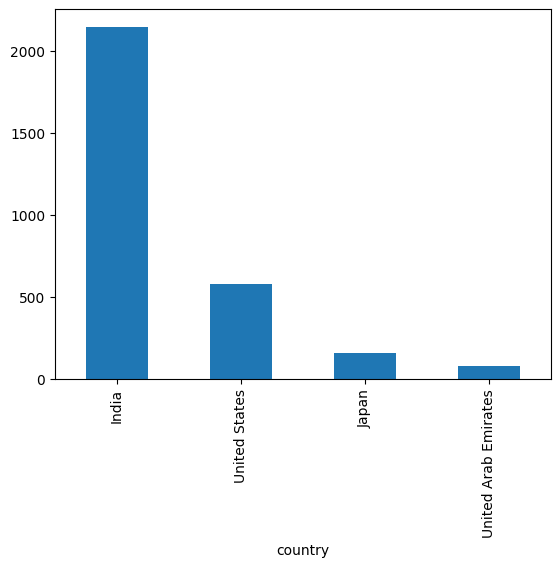

In [28]:
df['country'].value_counts().plot(kind='bar')
plt.show()

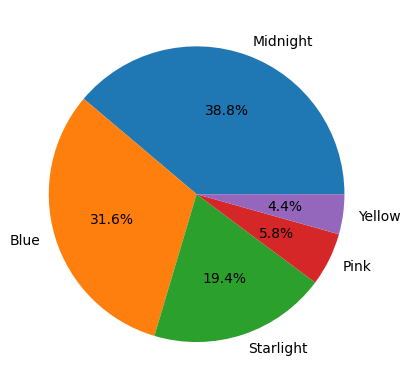

In [29]:
MidnightSize = df['variant'].str.contains('Color: MidnightSize', na = False).sum()
Blue = df['variant'].str.contains('Color: Blue', na = False).sum()
Starlight = df['variant'].str.contains('Color: Starlight', na = False).sum()
Pink = df['variant'].str.contains('Color: Pink', na = False).sum()
Yellow = df['variant'].str.contains('Color: Yellow', na = False).sum()

plt.pie([MidnightSize, Blue, Starlight, Pink, Yellow], labels=['Midnight', 'Blue', 'Starlight', 'Pink','Yellow'], autopct='%1.1f%%')
plt.show()

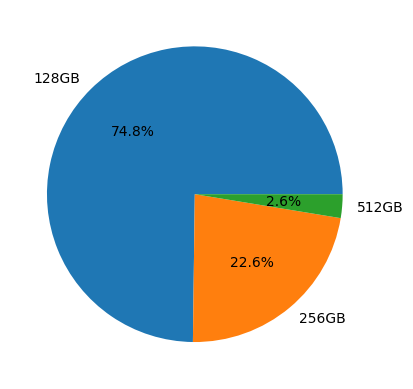

In [30]:
Size_128 = df['variant'].str.contains('Size: 128GB', na = False).sum()
Size_256 = df['variant'].str.contains('Size: 256GB', na = False).sum()
Size_512 = df['variant'].str.contains('Size: 512GB', na = False).sum()
plt.pie([Size_128, Size_256, Size_512], labels=['128GB', '256GB', '512GB'], autopct='%1.1f%%')
plt.show()


In [31]:
df[df['reviewDescription'].str.contains('not happy', na = False)]['reviewDescription']


,reviewDescription
1158,I recently purchased I phone 14 and I'm not ha...
1641,"Happy with the phone, but not happy with the s..."
1681,I bought it in good condition. I paid $450 but...
3058,iam not happy with this product why because ch...


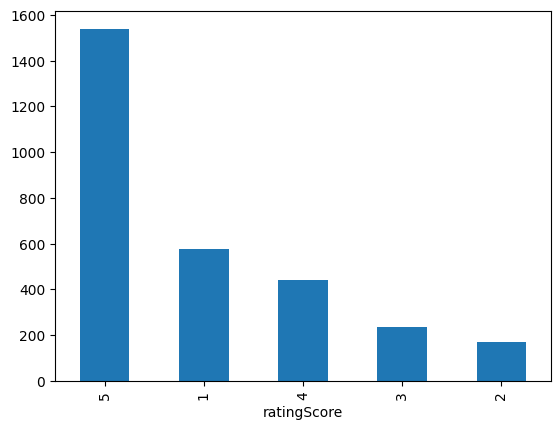

In [33]:
df['ratingScore'].value_counts().plot(kind='bar')
plt.show()

In [56]:
df[df['ratingScore'] == 5]['variant'].describe()

,variant
count,1539
unique,73
top,Colour: BlueSize: 128 GB
freq,113
